# Linear Regression

Regression? I know, I know, you are thinking that this is a statistical method to evaluate the relationship between and one input and one output variable (simple linear regression) or multiple inputs and an output variable (multiple regression). But the field of machine learning borrows from statistics often, and linear regression is a good way to predict the output of a continuous variable. 

Imagine we were in the market to buy a new car and one of our primary concerns was gas mileage. Well, we know that the `mpg` dataset has information about highway miles per gallon that would serve as an appropriate output as well as some other variables that might serve as good predictors of highway mpg. Can we build a regression model using this data to predict the gas mileage of a new car?

### Load in the Necessary Packages

In [2]:
library(dplyr)
library(caret)
library(ggplot2)



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: lattice
Loading required package: ggplot2


A bit of exploration is always encouraged before our attempts to define a model. Given that we are interested in predicting a continuous output variable (`hwy`), it would be good to see if any of the other numeric variables have a relationship with our output. 

Before we do that though, we must find all numeric variables in the dataset. Then we can run all of the numeric variables through a correlation matrix.

In [3]:
nums <- sapply(mpg, is.numeric)
cor(mpg[ , nums])

,displ,year,cyl,cty,hwy
displ,1.0000000,0.1478428,0.9302271,-0.7985240,-0.7660200
year,0.147842816,1.000000000,0.122245347,-0.037232291,0.002157643
cyl,0.9302271,0.1222453,1.0000000,-0.8057714,-0.7619124
cty,-0.79852397,-0.03723229,-0.80577141,1.00000000,0.95591591
hwy,-0.766020021,0.002157643,-0.761912354,0.955915914,1.000000000


Feel free to take a look at the `nums` object. All the `sapply` function is doing is checking each column in `mpg` to see if it is numeric. If it is, then `TRUE` will be returned, if not, then `FALSE`. We can then use this object to subset our data frame based on only those columns with a `TRUE` value and then run the `cor` function on the entire subset to create a correlation matrix.

Take a look...`hwy` is highly linearly correlated with `displ` and `cyl`. It is also extremely correlated with `cty` (city miles per gallon), but we will assume for our prediction that if we don't know the highway mpg, we also don't know the city mpg. 

Displacement looks like a good starting point for us.

In [4]:
frmla <- hwy ~ displ

Again, we can use the convenient formula syntax that `R` provides. As a reminder, what this formula is telling the trainer to do is to predict `hwy` by using the variable `displ`. We can then feed this `frmla` object into the train function in order to define the model.

In [5]:
m1 <- train(frmla, mpg, method = "lm")
summary(m1)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.1039 -2.1646 -0.2242  2.0589 15.0105 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  35.6977     0.7204   49.55   <2e-16 ***
displ        -3.5306     0.1945  -18.15   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.836 on 232 degrees of freedom
Multiple R-squared:  0.5868,	Adjusted R-squared:  0.585 
F-statistic: 329.5 on 1 and 232 DF,  p-value: < 2.2e-16


The `train()` function is very similar to the `tree()` function from the `tree` package, or the `naiveBayes()` function from `e1071`, but you will notice we specified another parameter other than the formula and the dataset. The `method` parameter specifies the type of model, in this case, "lm", or a linear model. We called this model `m1`.

We can assess the model by looking at the R-Squared value. This output is at the bottom of the summary, and is an assessment of how close the data are to the regression line. Values range from 0 to 1 and the higher the value the better the fit. In simpler terms, R-Squared is the percentage of variance that can be explained by the model.  

It is also a good idea to plot visualize your results.

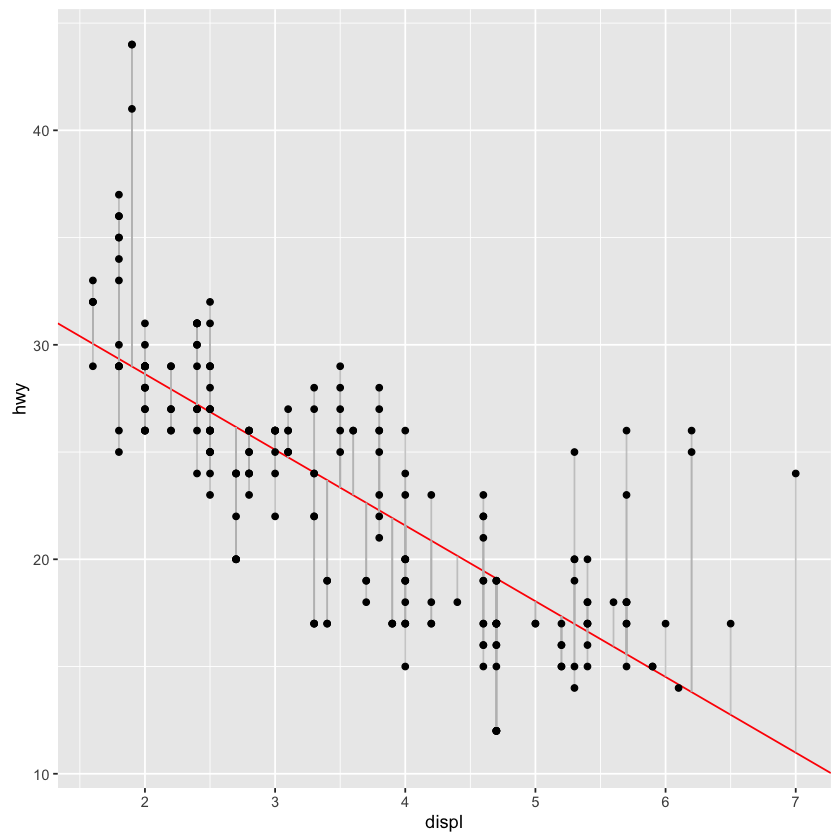

In [29]:
intcpt <- coef(m1$finalModel)[1] # extract the intercept
slp <- coef(m1$finalModel)[2]    # extract the slope

ggplot(mpg, aes(x = displ, y = hwy))  + 
    geom_abline(intercept = intcpt, slope = slp, colour = "red")+
    geom_segment(aes(x=displ, xend=displ, y=hwy, yend=fitted.values(m1)), colour = "grey", alpha = .75) +
    geom_point()

We can see a couple of things here. The first is that we are most certainly dealing with a linear relationship. I took the liberty to graphically represent the residuals with the vertical grey lines. To find the residual of an observation, you subtract the model predicted value from the observed value. In other words, it is the vertical distance between the observed value and the regression line. 

But notice that there are some points that are rather far from the regression line, particularly around the 5 to 7 `displ` range and between 23 and 27 `hwy`.  Can we account for this variation? This is the importance of doing data exploration before hand. Fortunately we have looked at this before, during our visualization module. Let's see the same plot but separated by `class`.

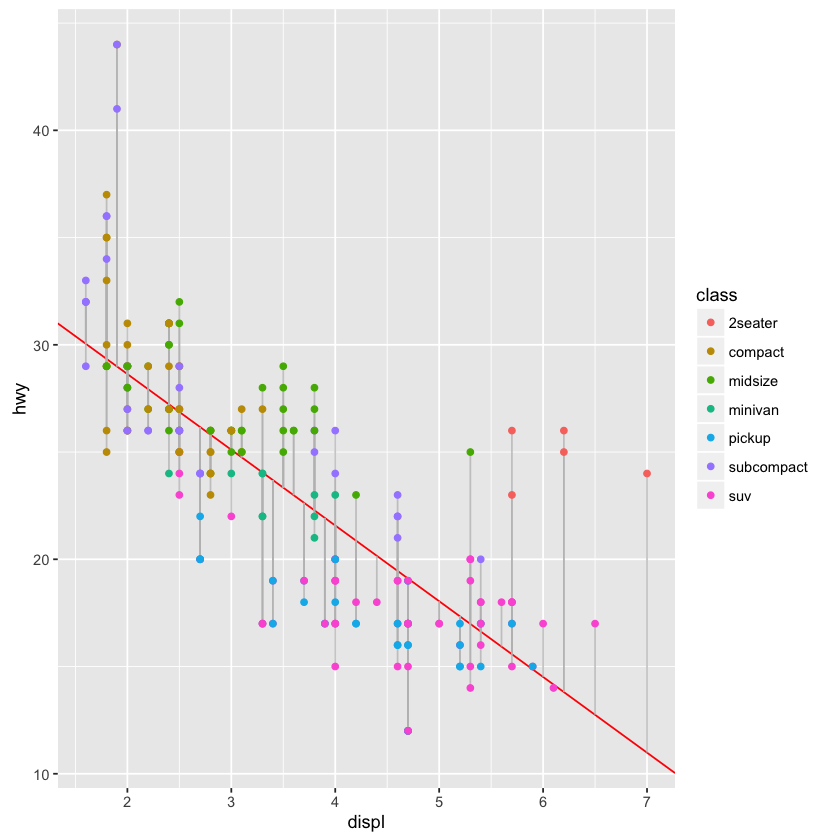

In [39]:
ggplot(mpg, aes(x = displ, y = hwy, colour = class))  + 
    geom_abline(intercept = intcpt, slope = slp, colour = "red")+
    geom_segment(aes(x=displ, xend=displ, y=hwy, yend=fitted.values(m1)), colour = "grey", alpha = .75) +
    geom_point()

Okay, we can now see that that the majority of those points in that region belong the "2seater" `class`. Perhaps accounting for `class` in our model would be appropriate. In other words, if I were trying to buy a car and I was going to predict its highway gas mileage of any given car, could I do so by knowing **both** the displacement and the class of the car? Let's see what happens...

In [42]:
frmla2 <- hwy ~ displ + class # define another formula 
m2 <- train(frmla2, mpg, method = "lm") # train the model 
summary(m2) # assess the model


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
   Min     1Q Median     3Q    Max 
-5.572 -1.569 -0.245  1.355 14.724 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      38.9533     1.7976  21.669  < 2e-16 ***
displ            -2.2976     0.2132 -10.778  < 2e-16 ***
classcompact     -5.3122     1.5283  -3.476 0.000610 ***
classmidsize     -4.9471     1.4722  -3.360 0.000914 ***
classminivan     -8.7986     1.5939  -5.520 9.26e-08 ***
classpickup     -11.9232     1.3687  -8.711 6.46e-16 ***
classsubcompact  -4.6988     1.5097  -3.112 0.002095 ** 
classsuv        -10.5851     1.3268  -7.978 7.43e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.745 on 226 degrees of freedom
Multiple R-squared:  0.7939,	Adjusted R-squared:  0.7875 
F-statistic: 124.3 on 7 and 226 DF,  p-value: < 2.2e-16


There is a little more output here to take a look at and that is because `class` is a categorical variable. In other words, each category of the `class` variable adjusts the intercept of the regression line to minimize the residuals of that category (ie. "suv", "2seater", etc.). As we can see, the R-Squared is a bit better for this model than the first model. The displacement and the class of the vehicle explain about 79% of the variance in highway miles per gallon.


Can we plot this? Of course! There are some steps of course...

In [52]:
coef.icept <- coef(m2$finalModel)[1] # define the intercept
coef.slope <- coef(m2$finalModel)[2] # define the slope
class_coefs <- coef(m2$finalModel)[2:8] # define adjusted slopes per class
mpg$pred<-predict(m2, newdata=mpg) # find the predicted values of the dataset mpg

So we defined the intercept and the slope. It is worth mentioning that this `displ` coefficient is also the adjusted intercept of the first category of the variable `class`, in this case, "2seater". Take a look back at the summary of the `m2`. You will see that no coefficient estimate exists for "class2seater". In other words, where the other class' intercepts will be the `coef.slope` + the respective `class_coef`, the "2seater" class will just be `coef.slope`. I know that this may be confusing, but let's take a look at the objects we just created:

In [61]:
paste("intercept:", coef.icept)
paste("slope:", coef.slope)
class_coefs

[1] "intercept: 38.9532565182444"

[1] "slope: -2.29760657763709"

displ    classcompact    classmidsize    classminivan     classpickup 
      -2.297607       -5.312227       -4.947079       -8.798645      -11.923225 
classsubcompact        classsuv 
      -4.698766      -10.585052

Notice how the class_coefs are alphabetical. That is why "2seater" is the default slope, because it was the first category read by the predict function. This alphabetical format will come in handy shortly again. For now, focus on what each of the category intercepts will be. For example, the "compact" class will have an intercept the modle intercept + -2.2976 + -5.3122. The whole purpose of extracting these values from the model is so that we can represent them visually. 

Now how about the `predict(m2, newdata=mpg)` line? This should look familiar. This is how we predict the output from a set of inputs. In this case, we are just finding the predicted points from the original dataset. We can also find these values by simply calling the `fitted.values()` function on the model. Take a look at the two methods side by side to verify... 

In [57]:
head(cbind(fitted.values(m2), mpg$pred))

1,29.50534,29.50534
2,29.50534,29.50534
3,29.04582,29.04582
4,29.04582,29.04582
5,27.20773,27.20773
6,27.20773,27.20773


The fitted values (or predicted values) are just a point on the regression line corresponding to an input. For example, I am interested in a "2seater" vehicle with a displacement of 5. The highway mpg that would be predicted would be that of the point where the displacement of 5 meets the regression line of the "2seater" class. We can predict the output by feeding it the input and then we can graph it for clarification.

In [62]:
displ <- 5 
class <- "2seater"
predict(m2,newdata= as.data.frame(cbind(as.numeric(displ),class)))

1 
27.46522

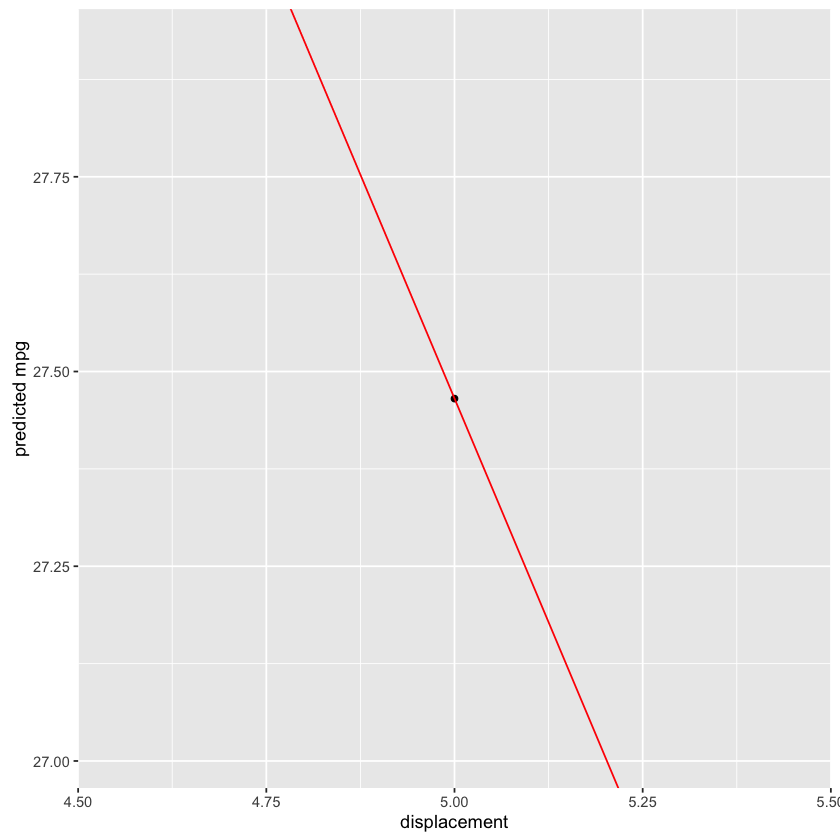

In [68]:
qplot(x = displ, y = predict(m2,newdata= as.data.frame(cbind(as.numeric(displ),class))) ) + 
geom_abline(intercept = coef.icept, slope = coef.slope, colour = "red" ) + labs(x = "displacement",y = "predicted mpg")

Now back to what we were doing...attempting to graph `m2`. This is going to take some data manipulation in order for it to work right. Remember, the `ggplot` function likes everything to be in data frame format; so essentially, we have to get the coefficients per category of class to be represented in the same data frame as the rest of the data. 

To start, we can combine the `class_coefs` list that we created above to the respective classes of the `mpg` data frame. This is where the alphabetical order will come in handy...

In [82]:
classes <- mpg %>% 
group_by(class) %>%
summarize()

coef <-cbind(classes, class_coefs)

coef

,class,class_coefs
displ,2seater,-2.29760657763709
classcompact,compact,-5.31222675365437
classmidsize,midsize,-4.94707924992926
classminivan,minivan,-8.79864512316597
classpickup,pickup,-11.9232250328054
classsubcompact,subcompact,-4.69876587887266
classsuv,suv,-10.5850517214521


We are going to try and take this whole process step-by-step. 

First, we are going to create a new data frame object called `classes` using `dplyr`. This will return an alphabetical list of the unique values in the `class` column. 

We then use `cbind` (stands for column bind) to cobine the `class_coefs` to the `classes` data frame that we just created. 

The next thing we have to do is replace the `class_coefs` value for the "2seater" class to 0. That is as simple as using the `mutate` function.

In [86]:
mod <- mutate(coef, class_coefs = replace(class_coefs, class_coefs == coef.slope, 0))
mod

,class,class_coefs
1,2seater,0
2,compact,-5.31222675365437
3,midsize,-4.94707924992926
4,minivan,-8.79864512316597
5,pickup,-11.9232250328054
6,subcompact,-4.69876587887266
7,suv,-10.5850517214521


There we go. Remember why we did this? Because the original slope of the `m2` is the slope for the class "2seater". We called this new data frame `mod`. Now we can create some layers in ggplot to display the different regression lines, residuals, and observed data of the model `m2`. 

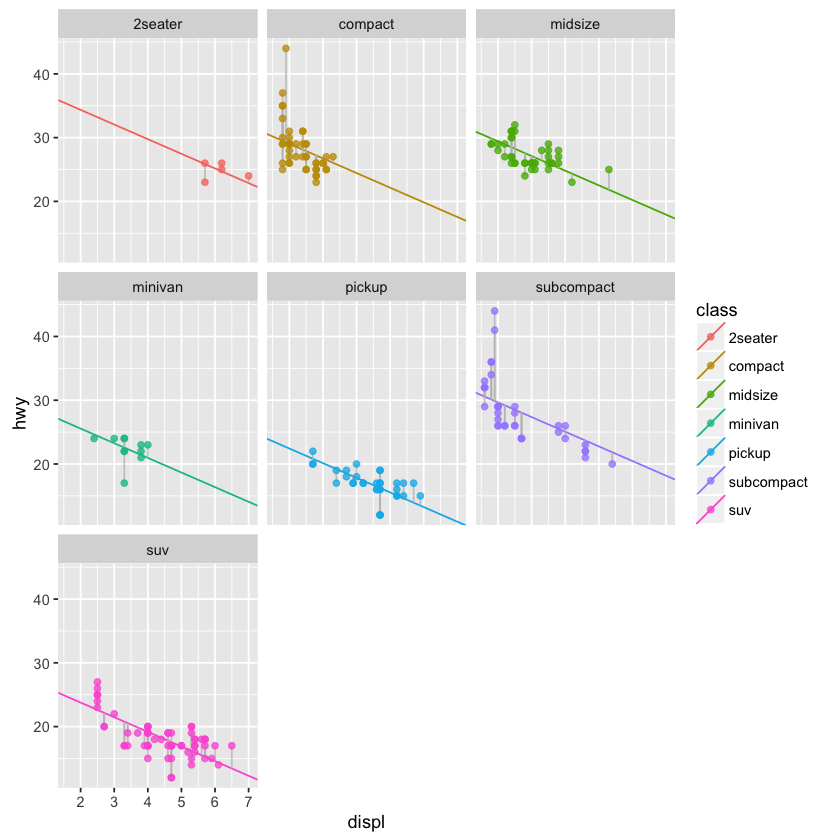

In [91]:
p<-ggplot(data = mpg, aes(displ,hwy))  + facet_wrap(~ class)

p + geom_abline(aes(slope = coef.slope, intercept = coef.icept+class_coefs, colour = class),mod ) +
geom_segment(aes(x=displ, xend=displ, y=hwy, yend=pred), colour = "grey", alpha = .75) + 
geom_point(aes(colour = class), alpha = .75)

Okay, do you see what we did there? We first created a layer of plots visualizing the relationship between the `displ` and `hwy` variables, faceted by `class`. We called this layer `p`. 

Here is the semi-complicated aspect. We want to add a regression line that takes both a slope and an intercept for each class. Now, since the slope is a constant across all classes, we can simply specify it by call the `coef.slope` we created above. But for the intercept, we want it to be the default intercept, `coef.icept` + the `class_coefs` for each class. Remember, we have to specify the `mod` data frame in this layer. Since there is a `class` column in this data frame, it still knows to facet per `class`. 

Then we just added some line segments to represent the residuals and plotted the points of the observed data. 


### Next Up...

Linear Regression Practice in `Python`!